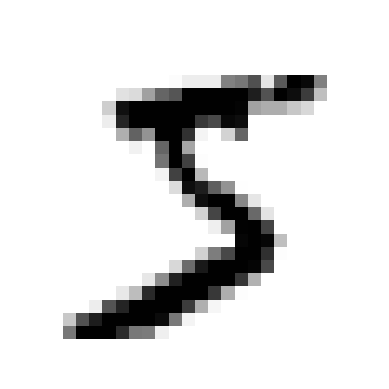

In [2]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./data/mnist.csv")
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()
